<a href="https://colab.research.google.com/github/SharvariCodes/Zomato-Restaurants-Exploratory-Analysis/blob/main/%F0%9F%8D%94%F0%9F%8D%9FZomato_Restaurants_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset Download from Kaggle**

In [1]:
# 1. download a .json API token from kaggle.
# 2. upload it onto the drive folder where the colab notebook is located.
# 3. Manage access -> anyone with link
# 4. use !gdown to access the token to download the files from kaggle for project.
!gdown --id 15jrRHzW3JFRJRFTqhWxtIF4b6OktnLZQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15jrRHzW3JFRJRFTqhWxtIF4b6OktnLZQ
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 352kB/s]


In [2]:
!ls /content

kaggle.json  sample_data


In [3]:
!mkdir /root/.kaggle
!cp /content/kaggle.json /root/.kaggle/kaggle.json

In [4]:
!ls -la ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Jul 13 04:53 .
drwx------ 1 root root 4096 Jul 13 04:53 ..
-rw-r--r-- 1 root root   69 Jul 13 04:53 kaggle.json


In [5]:
!kaggle datasets download shrutimehta/zomato-restaurants-data

 91% 5.00M/5.47M [00:00<00:00, 52.0MB/s]
100% 5.47M/5.47M [00:00<00:00, 50.3MB/s]


In [6]:
!unzip zomato-restaurants-data

Archive:  zomato-restaurants-data.zip
  inflating: Country-Code.xlsx       
  inflating: file1.json              
  inflating: file2.json              
  inflating: file3.json              
  inflating: file4.json              
  inflating: file5.json              
  inflating: zomato.csv              


## **Data Preparation and Cleaning**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
country = pd.read_excel('Country-Code.xlsx')

In [11]:
zomato = pd.read_csv('zomato.csv', encoding ='latin-1')

In [12]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [13]:
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


#### **Numerical Information at a glance**


In [14]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [15]:
zomato.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [16]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

#### **Cleaning the data**


In [17]:
zomato.shape

(9551, 21)

In [18]:
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [19]:
[features for features in zomato if zomato[features].isnull().sum() > 0]

['Cuisines']

In [20]:
zomato.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [21]:
zomato = zomato.dropna()

In [22]:
zomato.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [23]:
[features for features in zomato if zomato[features].duplicated() is False]

[]

In [25]:
duplicated = zomato.duplicated()
for i in duplicated:
    if duplicated is False:
        continue
    else:
        print(i)

Streaming output truncated to the last 5000 lines.
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F

Thus, no duplicates present!

#### **Removing Columns Irrelevant to Exploratory Data Analysis to make life easier!**

In [26]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [27]:
zomato['Votes'].unique()

array([ 314,  591,  270, ...,  788, 1034,  901])

In [28]:
zomato = zomato.drop(['Address', 'Locality','Locality Verbose','Longitude','Latitude'], axis=1)

In [29]:
zomato.shape

(9542, 16)

#### **Joining our tables using .merge() to make life even more easier!**

In [30]:
country.head(2)

,Country Code,Country
0,1,India
1,14,Australia


In [31]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [32]:
zomato_dataset = pd.merge(zomato, country, on= 'Country Code', how= 'left')

In [33]:
zomato_dataset.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


#### **Country Wise Usage and plotting**

In [34]:
country_wise_usage = zomato_dataset.Country.value_counts()
country_wise_usage

India             8652
United States      425
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [35]:
country_name = zomato_dataset.Country.value_counts().index
country_name

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [36]:
country_val = zomato_dataset.Country.value_counts().values
country_val

array([8652,  425,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

([<matplotlib.patches.Wedge at 0x7bc63efa77c0>,
 [Text(-1.083531565863807, 0.189629496061996, 'India'),
  Text(1.0779194567879458, -0.21929351262173782, 'United States'),
  Text(1.0995857034695016, -0.03018742661244155, 'United Kingdom')],
 [Text(-0.5910172177438947, 0.10343427057927053, '94.49%'),
  Text(0.5879560673388794, -0.1196146432482206, '4.64%'),
  Text(0.5997740200742735, -0.016465869061331753, '0.87%')])

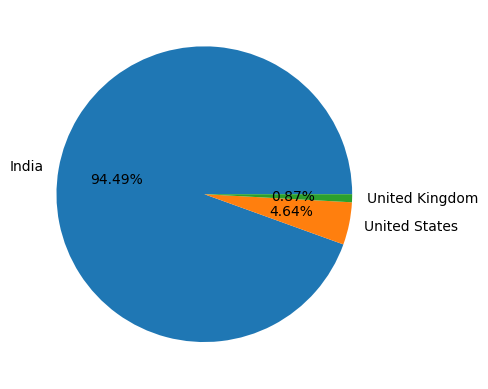

In [38]:
plt.pie(country_val[:3], labels=country_name[:3],autopct ='%1.2f%%')

**India is the top Zomato user, followed by the UK and the US.**

#### **Ratings Analysis**

In [41]:
zomato_dataset.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index(name = 'Rating Count')

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [43]:
rating = zomato_dataset.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index(name = 'Rating Count')

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

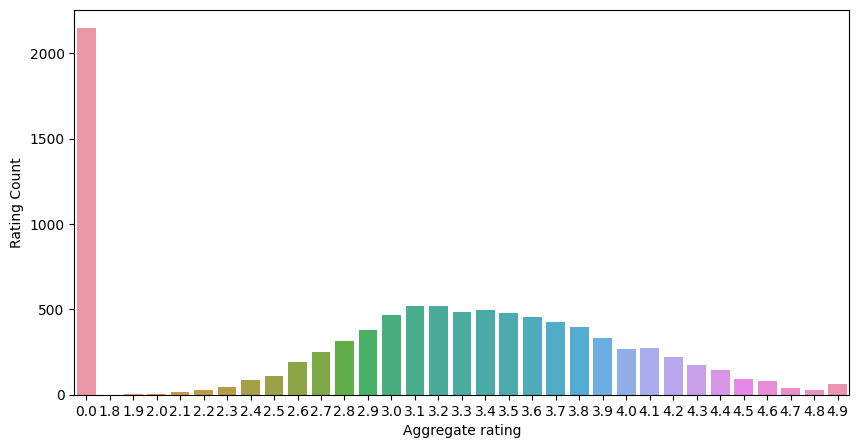

In [47]:
plt.rcParams['figure.figsize']=(10,5)
sns.barplot(x= 'Aggregate rating', y='Rating Count', data= rating)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

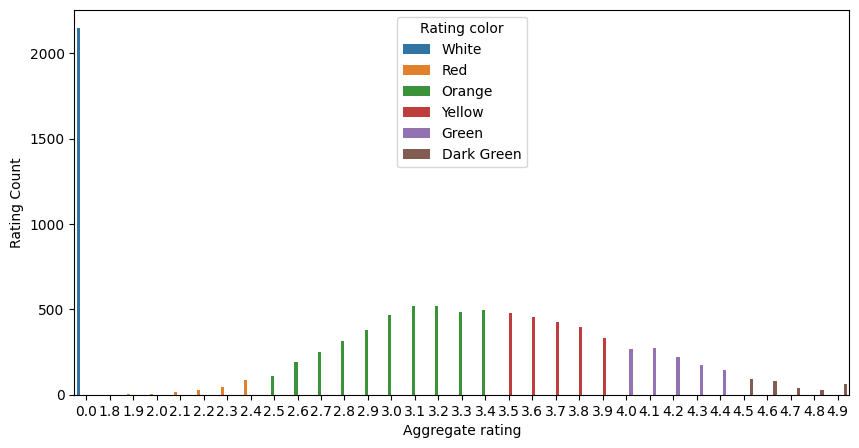

In [48]:
sns.barplot(x= 'Aggregate rating', y='Rating Count', data= rating, hue= 'Rating color')

<Axes: xlabel='Aggregate rating', ylabel='Rating color'>

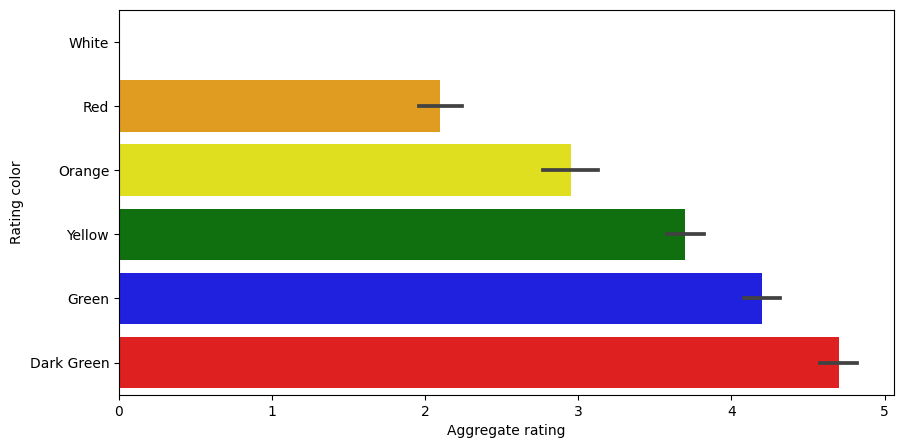

In [53]:
sns.barplot(x='Aggregate rating', y='Rating color', data= rating, palette=['red', 'orange', 'yellow', 'Green', 'Blue','red'])

Observation:
1- Not Rated count is very high
2- Maximum Number of rating are between 2.5 to 3.6

In [75]:
rating.sort_values(by= 'Rating Count', ascending=False)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
15,3.2,Orange,Average,522
14,3.1,Orange,Average,519
17,3.4,Orange,Average,495
16,3.3,Orange,Average,483
18,3.5,Yellow,Good,480
13,3.0,Orange,Average,468
19,3.6,Yellow,Good,458
20,3.7,Yellow,Good,427
21,3.8,Yellow,Good,399


In [72]:
sorted_ratings = rating.sort_values(by= 'Rating Count', ascending=False)

In [82]:
sorted_ratings['Rating Count'] = sorted_ratings['Rating Count'].astype('int')

In [83]:
values = sorted_ratings['Rating Count']

In [84]:
labels = sorted_ratings['Rating text']

#### **Zero Rating Restaurants Analysis**

In [59]:
zomato_dataset.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [60]:
zomato_dataset[zomato_dataset['Rating color']=='White']

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
30,6600060,Sandubas Cafí©,30,Brasí_lia,"Brazilian, Cafe",30,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2,Brazil
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Bar Food, Brazilian",70,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,1,Brazil
69,6710645,Cantinho da Gula,30,Sí£o Paulo,Brazilian,55,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0,Brazil
77,6701419,Divino Fogí£o,30,Sí£o Paulo,"Brazilian, Mineira",65,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,2,Brazil
78,6703956,Super Grill,30,Sí£o Paulo,Brazilian,50,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,2,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,18277023,Bread & Pasta,1,Noida,Fast Food,400,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1,India
9101,18313203,Chillies Cafe,1,Noida,Fast Food,600,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,3,India
9102,18254559,Platters,1,Noida,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0,India
9103,18255132,The Grand,1,Noida,"Raw Meats, Fast Food",250,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1,India


In [62]:
zomato_dataset[zomato_dataset['Rating color']=='White'].groupby(['Aggregate rating', 'Country']).size().reset_index(name='Zero Ratings Count')

,Aggregate rating,Country,Zero Ratings Count
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


#### **Currency Analysis**

In [66]:
zomato_dataset[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='Count')

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [90]:
currency = zomato_dataset[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='Count')

In [91]:
most_used_currency = currency.sort_values(by= 'Count', ascending=False)

In [92]:
most_used_currency

,Country,Currency,Count
3,India,Indian Rupees(Rs.),8652
14,United States,Dollar($),425
13,United Kingdom,Pounds(£),80
1,Brazil,Brazilian Real(R$),60
9,South Africa,Rand(R),60
12,UAE,Emirati Diram(AED),60
5,New Zealand,NewZealand($),40
11,Turkey,Turkish Lira(TL),34
0,Australia,Dollar($),24
6,Phillipines,Botswana Pula(P),22


#### **Online Deliveries**

In [93]:
zomato_dataset[zomato_dataset['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [96]:
zomato_dataset[zomato_dataset['Country']== 'India'].Country.value_counts()

India    8652
Name: Country, dtype: int64

Out of the total 8652 restaurants present in India, only 2423 locations have online delivery.

In [97]:
zomato_dataset[zomato_dataset['Country']== 'UAE'].Country.value_counts()

UAE    60
Name: Country, dtype: int64

In [98]:
city_values= zomato_dataset.City.value_counts().values
city_labels= zomato_dataset.City.value_counts().values

In [102]:
# plt.rcParams['figure.figsize']=(8,4)
# plt.pie(city_values[:3], city_labels[:3], autopct='%1.2f%%')

#### **Packing the data into a .csv**

In [104]:
zomato_dataset.to_csv('zomato_dataset.csv')